In [1]:
!pip install git+https://github.com/TimeSynth/TimeSynth.git -q

     |████████████████████████████████| 33.9MB 117kB/s 
     |████████████████████████████████| 143kB 46.0MB/s 


In [2]:
import timesynth as ts

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

**Harmonic signal generation**

In [5]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)

In [6]:
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=500, keep_percentage=50)

In [7]:
# Initializing Sinusoidal signal
sinusoid = ts.signals.Sinusoidal(frequency=0.25)

In [8]:
# Initializing Gaussian noise
white_noise = ts.noise.GaussianNoise(std=0.3)

In [9]:
# Initializing TimeSeries class with the signal and noise objects
timeseries = ts.TimeSeries(signal_generator=sinusoid, noise_generator=white_noise)

In [10]:
# Sampling using the irregular time samples
samples, signals, errors = timeseries.sample(irregular_time_samples)

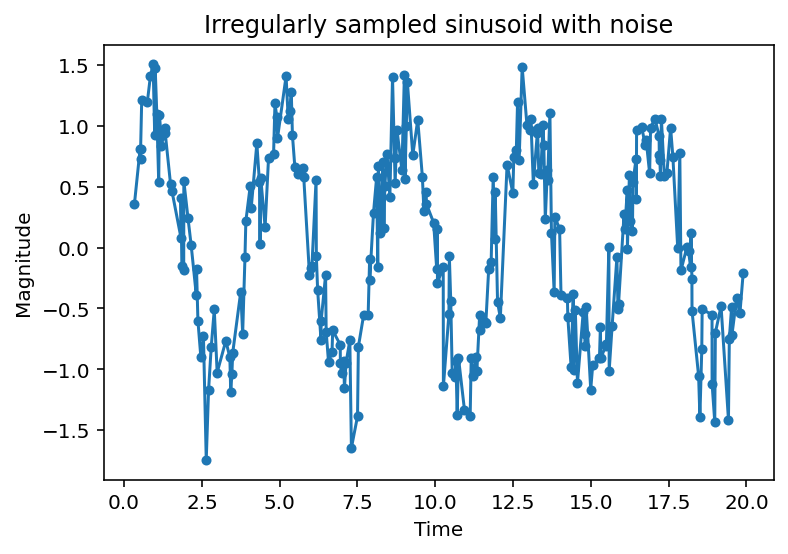

In [11]:
# Plotting the series
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with noise');

**Harmonic signals with red noise**

In [12]:
# Initializing Gaussian noise
red_noise = ts.noise.RedNoise(std=0.5, tau=0.8)

In [13]:
# Initializing TimeSeries class with the signal and noise objects
timeseries_corr = ts.TimeSeries(sinusoid, noise_generator=red_noise)

In [14]:
# Sampling using the irregular time samples
samples_corr, signals_corr, errors_corr = timeseries_corr.sample(irregular_time_samples)

Text(0.5, 1.0, 'Irregularly sampled sinusoid with red noise')

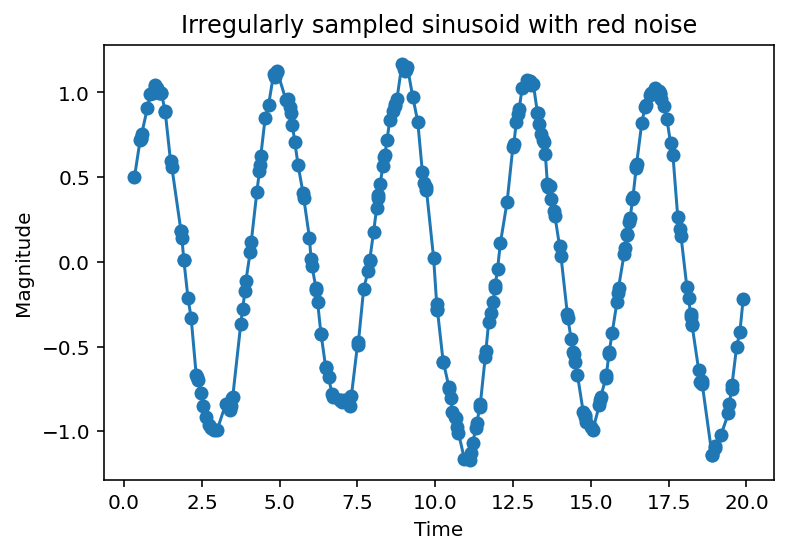

In [15]:
# Plotting the series
plt.plot(irregular_time_samples, samples_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Irregularly sampled sinusoid with red noise')

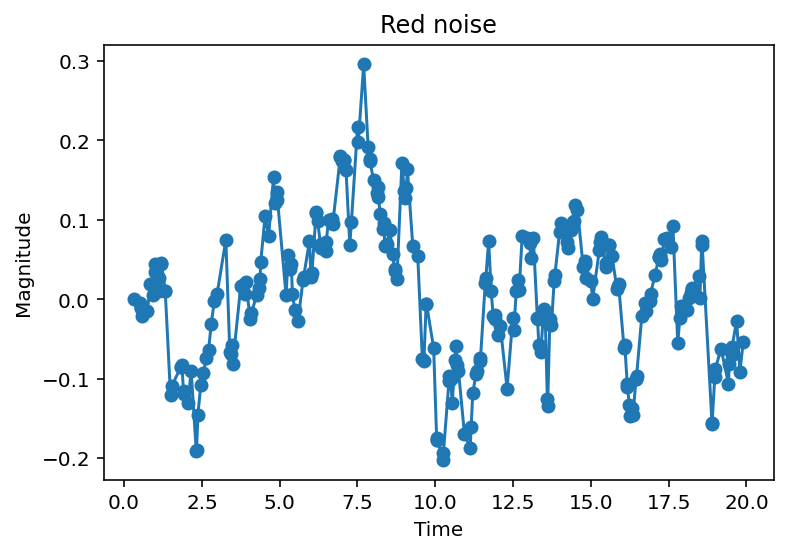

In [16]:
plt.plot(irregular_time_samples, errors_corr, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Red noise');

**Pseudoperiodic signal**

In [17]:
# Initializing TimeSampler
time_sampler_pp = ts.TimeSampler(stop_time=20)

In [18]:
# Sampling irregular time samples
irregular_time_samples_pp = time_sampler_pp.sample_irregular_time(resolution=0.05, keep_percentage=50)

In [19]:
# Initializing Pseudoperiodic signal
pseudo_periodic = ts.signals.PseudoPeriodic(frequency=2, freqSD=0.01, ampSD=0.5)

In [20]:
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_pp = ts.TimeSeries(pseudo_periodic)

In [21]:
# Sampling using the irregular time samples
samples_pp, signals_pp, errors_pp = timeseries_pp.sample(irregular_time_samples_pp)

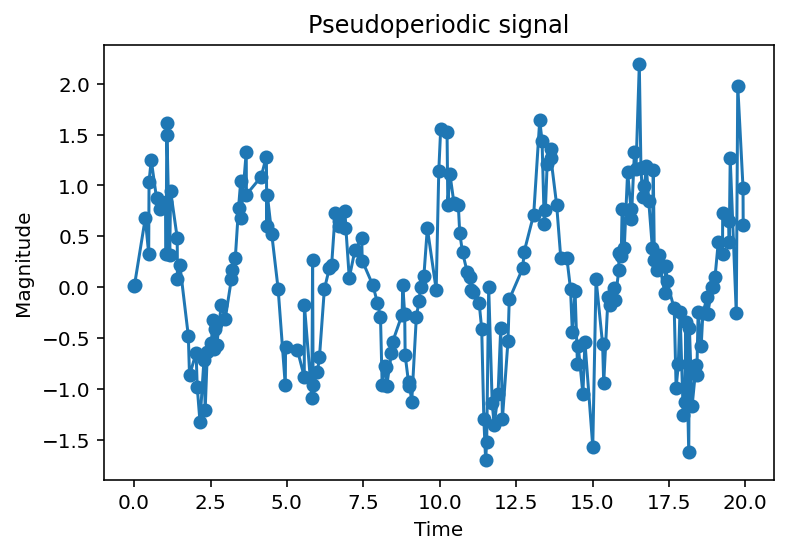

In [22]:
# Plotting the series
plt.plot(irregular_time_samples_pp, samples_pp, marker='o')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Pseudoperiodic signal');

**Gaussian process signal generation**

In [23]:
gp = ts.signals.GaussianProcess(kernel='Matern', nu=3./2)

In [24]:
gp_series = ts.TimeSeries(signal_generator=gp)

In [25]:
samples = gp_series.sample(irregular_time_samples)[0]

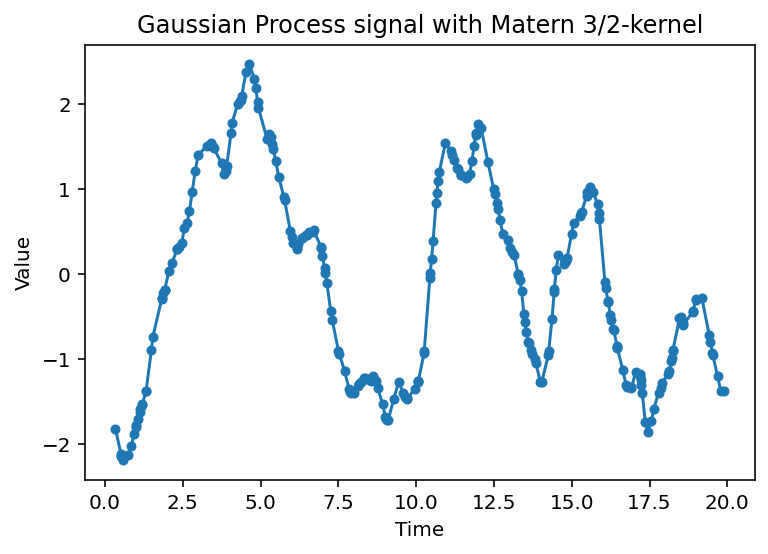

In [26]:
plt.plot(irregular_time_samples, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gaussian Process signal with Matern 3/2-kernel');

**CAR model**

In [27]:
car = ts.signals.CAR(ar_param=0.9, sigma=0.01)

In [28]:
car_series = ts.TimeSeries(signal_generator=car)

In [29]:
samples = car_series.sample(irregular_time_samples)

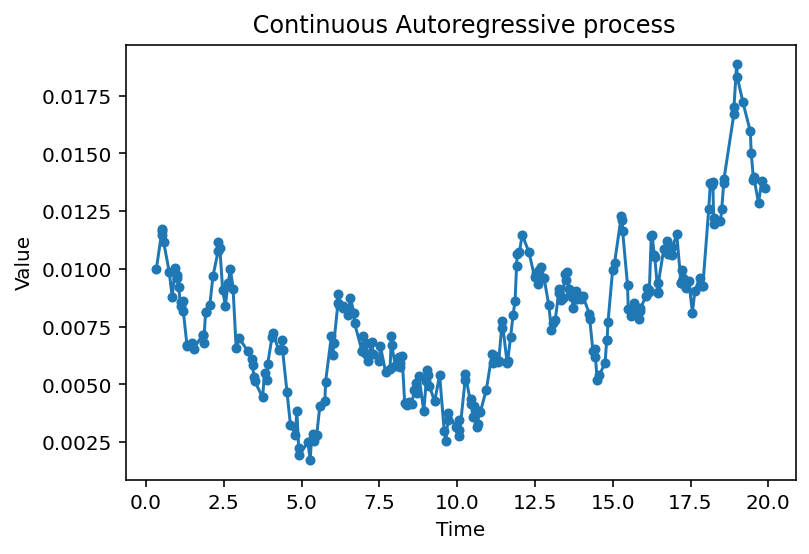

In [30]:
plt.plot(irregular_time_samples, samples[0], marker='o', markersize=4)
plt.xlabel('Time')  #X-axis label
plt.ylabel('Value')  #Y-axis label
plt.title(' Continuous Autoregressive process');  #title of the plot


**AR model for regularly sampled timestamps**

In [31]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)

In [32]:
# Sampling regular time samples
regular_time_samples = time_sampler.sample_regular_time(num_points=500)

In [33]:
# Initializing AR(2) model
ar_p = ts.signals.AutoRegressive(ar_param=[1.5, -0.75])

In [34]:
ar_p_series = ts.TimeSeries(signal_generator=ar_p)

In [35]:
samples = ar_p_series.sample(regular_time_samples)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


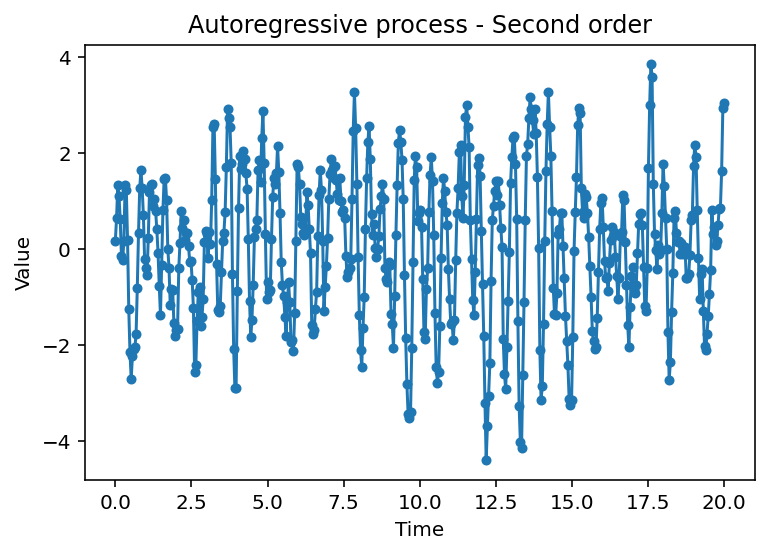

In [36]:
plt.plot(regular_time_samples, samples[0], marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Autoregressive process - Second order');

**Mackey-Glass signal**

In [37]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=1500)

In [38]:
# Sampling irregular time samples
irregular_time_samples = time_sampler.sample_irregular_time(num_points=1500, keep_percentage=75)

In [39]:
mg = ts.signals.MackeyGlass()
noise = ts.noise.GaussianNoise(std=0.1)
mg_series = ts.TimeSeries(signal_generator=mg, noise_generator=noise)
mg_samples, mg_signals, mg_errors = mg_series.sample(irregular_time_samples)

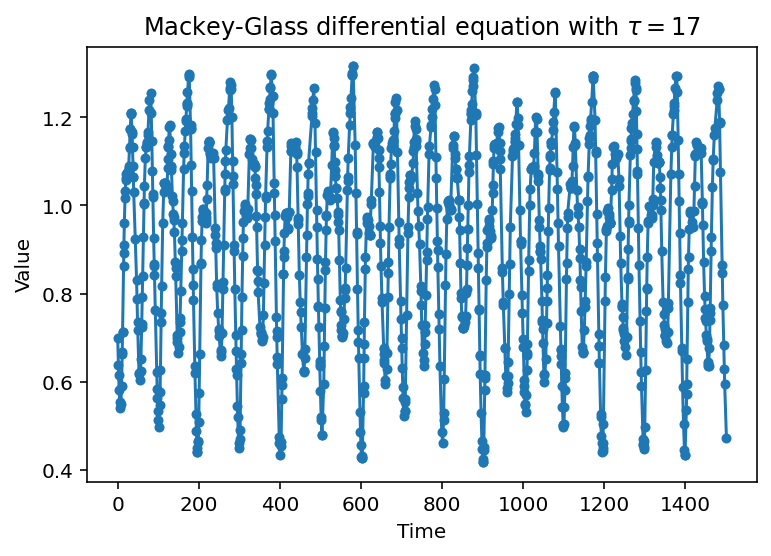

In [40]:
plt.plot(irregular_time_samples, mg_signals, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mackey-Glass differential equation with $\\tau=17$');


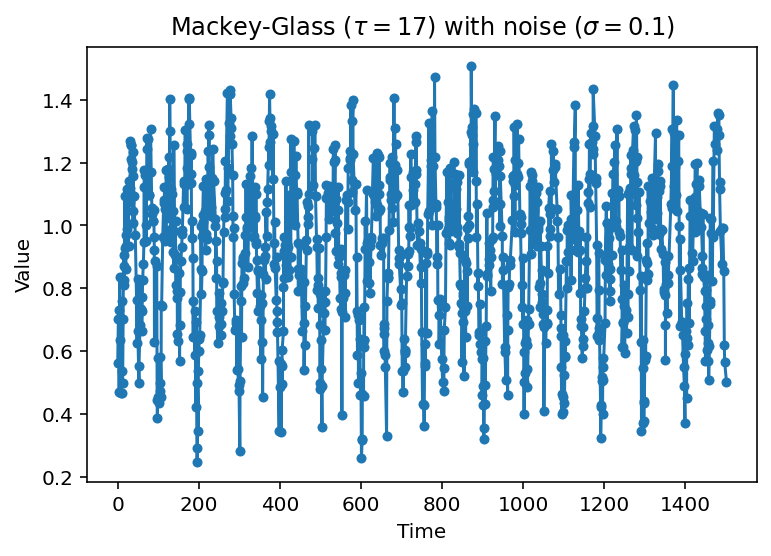

In [41]:
plt.plot(irregular_time_samples, mg_samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mackey-Glass ($\\tau=17$) with noise ($\\sigma = 0.1$)');

**NARMA series**

In [42]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=500)


In [43]:
# Sampling irregular time samples
times = time_sampler.sample_regular_time(resolution=1.)


In [44]:
# Take Samples
narma_signal = ts.signals.NARMA(order=10)
series = ts.TimeSeries(narma_signal)
samples, _, _ = series.sample(times)


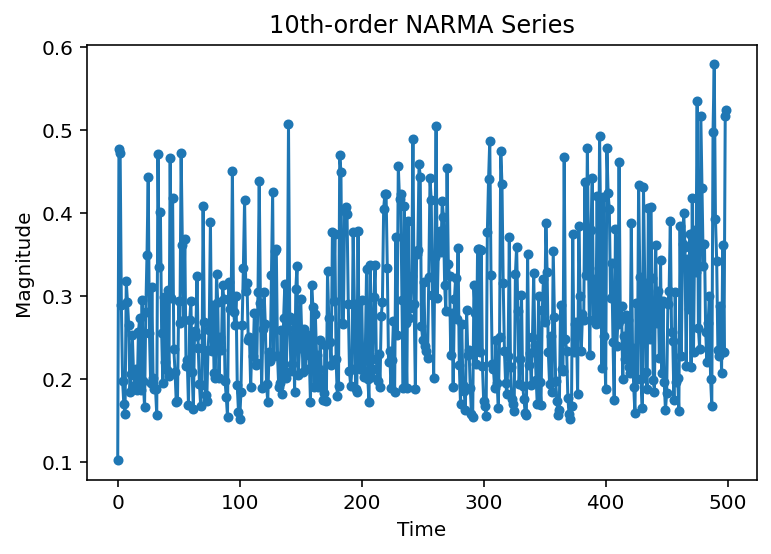

In [45]:
# Plotting the series
plt.plot(times, samples, marker='o', markersize=4)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('10th-order NARMA Series');